In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
h_data = pd.read_csv('holidays_events.csv')
oil = pd.read_csv('oil.csv')
stores = pd.read_csv('stores.csv')
train = pd.read_csv('t_data.csv')
test = pd.read_csv('test.csv')
transactions = pd.read_csv('transactions.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [34]:
h_data

,date,type,locale,locale_name,description,transferred
0,3/2/2012,Holiday,Local,Manta,Fundacion de Manta,False
1,4/1/2012,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,4/12/2012,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,4/14/2012,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,4/21/2012,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,12/22/2017,Additional,National,Ecuador,Navidad-3,False
346,12/23/2017,Additional,National,Ecuador,Navidad-2,False
347,12/24/2017,Additional,National,Ecuador,Navidad-1,False
348,12/25/2017,Holiday,National,Ecuador,Navidad,False


In [22]:
print(type(h_data))

<class 'pandas.core.frame.DataFrame'>


In [23]:
h_data.value_counts()

date        type        locale    locale_name  description                    transferred
1/1/2013    Holiday     National  Ecuador      Primer dia del ano             False          1
5/15/2016   Event       National  Ecuador      Terremoto Manabi+29            False          1
5/26/2017   Transfer    National  Ecuador      Traslado Batalla de Pichincha  False          1
5/24/2017   Holiday     National  Ecuador      Batalla de Pichincha           True           1
5/24/2016   Holiday     National  Ecuador      Batalla de Pichincha           True           1
                                                                                            ..
12/26/2014  Additional  National  Ecuador      Navidad+1                      False          1
12/26/2013  Additional  National  Ecuador      Navidad+1                      False          1
12/26/2012  Additional  National  Ecuador      Navidad+1                      False          1
12/25/2017  Holiday     National  Ecuador      Navidad 

In [24]:
oil.isnull().sum()

date           0
dcoilwtico    43
dtype: int64

In [35]:
oil["dcoilwtico"] = oil["dcoilwtico"].fillna(oil["dcoilwtico"].mean())
oil.isnull().sum()

date          0
dcoilwtico    0
dtype: int64

In [26]:
oil

,date,dcoilwtico
0,2013-01-01,67.714366
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-07,93.200000
...,...,...
1213,2017-08-25,47.650000
1214,2017-08-28,46.400000
1215,2017-08-29,46.460000
1216,2017-08-30,45.960000


In [36]:
train = train.merge(oil , on='date',how='left')
train

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,67.714366
1,1,2013-01-01,1,BABY CARE,0.000,0,67.714366
2,2,2013-01-01,1,BEAUTY,0.000,0,67.714366
3,3,2013-01-01,1,BEVERAGES,0.000,0,67.714366
4,4,2013-01-01,1,BOOKS,0.000,0,67.714366
...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.570000
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.570000
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.570000
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.570000


In [28]:
train.isnull().sum()

id                  0
date                0
store_nbr           0
family              0
sales               0
onpromotion         0
dcoilwtico     857142
dtype: int64

In [37]:
train["dcoilwtico"] = train["dcoilwtico"].fillna(train["dcoilwtico"].mean())
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dcoilwtico     0
dtype: int64

In [38]:
stores

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
5,6,Quito,Pichincha,D,13
6,7,Quito,Pichincha,D,8
7,8,Quito,Pichincha,D,8
8,9,Quito,Pichincha,B,6
9,10,Quito,Pichincha,C,15


In [39]:
train = train.merge(stores,on='store_nbr',how='left')
train

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,67.714366,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,67.714366,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,67.714366,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,67.714366,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,67.714366,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.570000,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.570000,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.570000,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.570000,Quito,Pichincha,B,6


In [ ]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dcoilwtico     0
city           0
state          0
type           0
cluster        0
dtype: int64

In [40]:
import pandas as pd
data1 = h_data["date"]

df1 = pd.DataFrame(data1)
df1['date'] = pd.to_datetime(df1['date'], format='%m/%d/%Y')
df1

,date
0,2012-03-02
1,2012-04-01
2,2012-04-12
3,2012-04-14
4,2012-04-21
...,...
345,2017-12-22
346,2017-12-23
347,2017-12-24
348,2017-12-25


In [43]:
# h_data=h_data.drop(columns=(["date"]))
# h_data1= pd.concat([df1,h_data],axis=1)
h_data1 =  h_data1.rename(columns={"type":"holi_type"})
h_data1

,date,holi_type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [ ]:
train

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,67.714366,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,67.714366,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,67.714366,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,67.714366,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,67.714366,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,47.570000,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.570000,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.570000,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.570000,Quito,Pichincha,B,6


In [ ]:
h_data1["date"].value_counts()

date
2014-06-25    4
2017-06-25    3
2016-06-25    3
2015-06-25    3
2013-06-25    3
             ..
2014-07-13    1
2014-07-12    1
2014-07-09    1
2014-07-08    1
2017-12-26    1
Name: count, Length: 312, dtype: int64

In [ ]:
h_data1

,date,holi_type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [ ]:
h_data1.isnull().sum()

date           0
holi_type      0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [44]:
# Assuming 'date' column is in datetime format in both DataFrames
train['date'] = pd.to_datetime(train['date'])
h_data1['date'] = pd.to_datetime(h_data1['date'])

In [ ]:
train.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dcoilwtico     0
city           0
state          0
type           0
cluster        0
dtype: int64

In [45]:
df3 = pd.merge(train, h_data1, on='date', how='left')
df3

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,holi_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,67.714366,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,67.714366,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,67.714366,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,67.714366,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,67.714366,Quito,Pichincha,D,13,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,47.570000,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.570000,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.570000,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.570000,Quito,Pichincha,B,6,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [ ]:
df3.isnull().sum()

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
dcoilwtico           0
city                 0
state                0
type                 0
cluster              0
holi_type      2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64

In [46]:
df3 = df3.drop(columns=(["locale","locale_name","description"]))
df3 = df3.drop(columns=(["id","state"]))

In [ ]:
df3.isnull().sum()

date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
dcoilwtico           0
city                 0
type                 0
cluster              0
holi_type      2551824
transferred    2551824
dtype: int64

In [ ]:
df3["holi_type"].value_counts()

holi_type
Holiday       304722
Event          99792
Additional     67716
Transfer       16038
Work Day        8910
Bridge          5346
Name: count, dtype: int64

In [47]:
df3["holi_type"] = df3["holi_type"].fillna("Non_holiday")
df3["transferred"] = df3["transferred"].fillna(False)

In [ ]:
df3["transferred"].value_counts()

transferred
False    3038310
True       16038
Name: count, dtype: int64

In [48]:
df3["transferred"] = df3["transferred"].astype(bool)
df3["transferred"] = df3["transferred"].astype(int)

In [49]:
df3["transferred"].value_counts()

transferred
0    3038310
1      16038
Name: count, dtype: int64

In [ ]:
df3

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,type,cluster,holi_type,transferred
0,2013-01-01,1,AUTOMOTIVE,0.000,0,67.714366,Quito,D,13,Holiday,0
1,2013-01-01,1,BABY CARE,0.000,0,67.714366,Quito,D,13,Holiday,0
2,2013-01-01,1,BEAUTY,0.000,0,67.714366,Quito,D,13,Holiday,0
3,2013-01-01,1,BEVERAGES,0.000,0,67.714366,Quito,D,13,Holiday,0
4,2013-01-01,1,BOOKS,0.000,0,67.714366,Quito,D,13,Holiday,0
...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,47.570000,Quito,B,6,Holiday,0
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,47.570000,Quito,B,6,Holiday,0
3054345,2017-08-15,9,PRODUCE,2419.729,148,47.570000,Quito,B,6,Holiday,0
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.570000,Quito,B,6,Holiday,0


In [50]:
dff = df3
dff

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,type,cluster,holi_type,transferred
0,2013-01-01,1,AUTOMOTIVE,0.000,0,67.714366,Quito,D,13,Holiday,0
1,2013-01-01,1,BABY CARE,0.000,0,67.714366,Quito,D,13,Holiday,0
2,2013-01-01,1,BEAUTY,0.000,0,67.714366,Quito,D,13,Holiday,0
3,2013-01-01,1,BEVERAGES,0.000,0,67.714366,Quito,D,13,Holiday,0
4,2013-01-01,1,BOOKS,0.000,0,67.714366,Quito,D,13,Holiday,0
...,...,...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,47.570000,Quito,B,6,Holiday,0
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,47.570000,Quito,B,6,Holiday,0
3054345,2017-08-15,9,PRODUCE,2419.729,148,47.570000,Quito,B,6,Holiday,0
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.570000,Quito,B,6,Holiday,0


In [51]:
dff["date"] = dff["date"].astype(int)
dff["date"]

0          1356998400000000000
1          1356998400000000000
2          1356998400000000000
3          1356998400000000000
4          1356998400000000000
                  ...         
3054343    1502755200000000000
3054344    1502755200000000000
3054345    1502755200000000000
3054346    1502755200000000000
3054347    1502755200000000000
Name: date, Length: 3054348, dtype: int64

In [ ]:
# dff["transferred"] = dff["transferred"].astype(bool)
dff["transferred"] = dff["transferred"].astype(int)
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
 5   dcoilwtico   float64
 6   city         object 
 7   type         object 
 8   cluster      int64  
 9   holi_type    object 
 10  transferred  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 256.3+ MB


In [52]:
dff["transferred"].value_counts()

transferred
0    3038310
1      16038
Name: count, dtype: int64

In [53]:
dff.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dcoilwtico     0
city           0
type           0
cluster        0
holi_type      0
transferred    0
dtype: int64

In [54]:
# dff = dff.drop(columns=(["locale","locale_name","description"]))
dff

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,type,cluster,holi_type,transferred
0,1356998400000000000,1,AUTOMOTIVE,0.000,0,67.714366,Quito,D,13,Holiday,0
1,1356998400000000000,1,BABY CARE,0.000,0,67.714366,Quito,D,13,Holiday,0
2,1356998400000000000,1,BEAUTY,0.000,0,67.714366,Quito,D,13,Holiday,0
3,1356998400000000000,1,BEVERAGES,0.000,0,67.714366,Quito,D,13,Holiday,0
4,1356998400000000000,1,BOOKS,0.000,0,67.714366,Quito,D,13,Holiday,0
...,...,...,...,...,...,...,...,...,...,...,...
3054343,1502755200000000000,9,POULTRY,438.133,0,47.570000,Quito,B,6,Holiday,0
3054344,1502755200000000000,9,PREPARED FOODS,154.553,1,47.570000,Quito,B,6,Holiday,0
3054345,1502755200000000000,9,PRODUCE,2419.729,148,47.570000,Quito,B,6,Holiday,0
3054346,1502755200000000000,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.570000,Quito,B,6,Holiday,0


In [ ]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   date         int64  
 1   store_nbr    int64  
 2   family       object 
 3   sales        float64
 4   onpromotion  int64  
 5   dcoilwtico   float64
 6   city         object 
 7   type         object 
 8   cluster      int64  
 9   holi_type    object 
 10  transferred  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 256.3+ MB


In [ ]:
dff["family"].unique()

array(['AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES',
       'SEAFOOD'], dtype=object)

In [ ]:
dff["city"].unique()

array(['Quito', 'Cayambe', 'Latacunga', 'Riobamba', 'Ibarra',
       'Santo Domingo', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil',
       'Salinas', 'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad',
       'Cuenca', 'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'],
      dtype=object)

In [55]:
in_d = dff[["type","holi_type","family","city"]]
in_d

,type,holi_type,family,city
0,D,Holiday,AUTOMOTIVE,Quito
1,D,Holiday,BABY CARE,Quito
2,D,Holiday,BEAUTY,Quito
3,D,Holiday,BEVERAGES,Quito
4,D,Holiday,BOOKS,Quito
...,...,...,...,...
3054343,B,Holiday,POULTRY,Quito
3054344,B,Holiday,PREPARED FOODS,Quito
3054345,B,Holiday,PRODUCE,Quito
3054346,B,Holiday,SCHOOL AND OFFICE SUPPLIES,Quito


In [56]:
import numpy as np 
from sklearn.preprocessing import OneHotEncoder
le = OneHotEncoder()#encoding actuallly convert its values into 1 and 0
df1=le.fit_transform(in_d).toarray()
df1

/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [61]:
df1 = pd.DataFrame(df1 , columns=["D","C","A","B","E","Holiday","Event","Additional","Transfer","Work Day","Bridge"'AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY',
       'PREPARED FOODS', 'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES','Quito', 'Cayambe', 'Latacunga', 'Riobamba', 'Ibarra',
       'Santo Domingo', 'Guaranda', 'Puyo', 'Ambato', 'Guayaquil',
       'Salinas', 'Daule', 'Babahoyo', 'Quevedo', 'Playas', 'Libertad',
       'Cuenca', 'Loja', 'Machala', 'Esmeraldas', 'Manta', 'El Carmen'])
df1

,D,C,A,B,E,Holiday,Event,Additional,Transfer,Work Day,...,Babahoyo,Quevedo,Playas,Libertad,Cuenca,Loja,Machala,Esmeraldas,Manta,El Carmen
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3054344,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3054345,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3054346,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [59]:
dff 

,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,type,cluster,holi_type,transferred
0,1356998400000000000,1,AUTOMOTIVE,0.000,0,67.714366,Quito,D,13,Holiday,0
1,1356998400000000000,1,BABY CARE,0.000,0,67.714366,Quito,D,13,Holiday,0
2,1356998400000000000,1,BEAUTY,0.000,0,67.714366,Quito,D,13,Holiday,0
3,1356998400000000000,1,BEVERAGES,0.000,0,67.714366,Quito,D,13,Holiday,0
4,1356998400000000000,1,BOOKS,0.000,0,67.714366,Quito,D,13,Holiday,0
...,...,...,...,...,...,...,...,...,...,...,...
3054343,1502755200000000000,9,POULTRY,438.133,0,47.570000,Quito,B,6,Holiday,0
3054344,1502755200000000000,9,PREPARED FOODS,154.553,1,47.570000,Quito,B,6,Holiday,0
3054345,1502755200000000000,9,PRODUCE,2419.729,148,47.570000,Quito,B,6,Holiday,0
3054346,1502755200000000000,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.570000,Quito,B,6,Holiday,0


In [62]:
dff = dff.drop(columns=(["family","city","type","holi_type"]))
dff

,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,transferred
0,1356998400000000000,1,0.000,0,67.714366,13,0
1,1356998400000000000,1,0.000,0,67.714366,13,0
2,1356998400000000000,1,0.000,0,67.714366,13,0
3,1356998400000000000,1,0.000,0,67.714366,13,0
4,1356998400000000000,1,0.000,0,67.714366,13,0
...,...,...,...,...,...,...,...
3054343,1502755200000000000,9,438.133,0,47.570000,6,0
3054344,1502755200000000000,9,154.553,1,47.570000,6,0
3054345,1502755200000000000,9,2419.729,148,47.570000,6,0
3054346,1502755200000000000,9,121.000,8,47.570000,6,0


In [63]:
Df = pd.concat([dff,df1],axis=1)
Df

,date,store_nbr,sales,onpromotion,dcoilwtico,cluster,transferred,D,C,A,...,Babahoyo,Quevedo,Playas,Libertad,Cuenca,Loja,Machala,Esmeraldas,Manta,El Carmen
0,1356998400000000000,1,0.000,0,67.714366,13,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1356998400000000000,1,0.000,0,67.714366,13,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1356998400000000000,1,0.000,0,67.714366,13,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1356998400000000000,1,0.000,0,67.714366,13,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1356998400000000000,1,0.000,0,67.714366,13,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,1502755200000000000,9,438.133,0,47.570000,6,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3054344,1502755200000000000,9,154.553,1,47.570000,6,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3054345,1502755200000000000,9,2419.729,148,47.570000,6,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3054346,1502755200000000000,9,121.000,8,47.570000,6,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
Df.isnull().sum()

date           0
store_nbr      0
sales          0
onpromotion    0
dcoilwtico     0
              ..
Loja           0
Machala        0
Esmeraldas     0
Manta          0
El Carmen      0
Length: 71, dtype: int64

In [ ]:
import joblib
file = "encoder.pkl"
joblib.dump(le,file)

['encoder.pkl']

In [ ]:
le6 = joblib.load("encoder.pkl")
le6

OneHotEncoder()

In [ ]:
Df["date"] = Df["date"].astype(int)

In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 71 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   date                        int64  
 1   store_nbr                   int64  
 2   sales                       float64
 3   onpromotion                 int64  
 4   dcoilwtico                  float64
 5   cluster                     int64  
 6   transferred                 int64  
 7   D                           float64
 8   C                           float64
 9   A                           float64
 10  B                           float64
 11  E                           float64
 12  Holiday                     float64
 13  Event                       float64
 14  Additional                  float64
 15  Transfer                    float64
 16  Work Day                    float64
 17  BridgeAUTOMOTIVE            float64
 18  BABY CARE                   float64
 19  BEAUTY               

In [ ]:
Df.isnull().sum()

date           0
store_nbr      0
family         0
sales          0
onpromotion    0
              ..
Loja           0
Machala        0
Esmeraldas     0
Manta          0
El Carmen      0
Length: 78, dtype: int64

In [64]:
x = Df.drop(columns=(["sales"]))
x

,date,store_nbr,onpromotion,dcoilwtico,cluster,transferred,D,C,A,B,...,Babahoyo,Quevedo,Playas,Libertad,Cuenca,Loja,Machala,Esmeraldas,Manta,El Carmen
0,1356998400000000000,1,0,67.714366,13,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1356998400000000000,1,0,67.714366,13,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1356998400000000000,1,0,67.714366,13,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1356998400000000000,1,0,67.714366,13,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1356998400000000000,1,0,67.714366,13,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,1502755200000000000,9,0,47.570000,6,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3054344,1502755200000000000,9,1,47.570000,6,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3054345,1502755200000000000,9,148,47.570000,6,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3054346,1502755200000000000,9,8,47.570000,6,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
y = Df["sales"]
y=pd.DataFrame(y)
y

,sales
0,0.000
1,0.000
2,0.000
3,0.000
4,0.000
...,...
3054343,438.133
3054344,154.553
3054345,2419.729
3054346,121.000


In [ ]:
print(type(Df))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
#the process of normalizing the range of features in a dataset.
#FEATURE SCALING... 

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# x1 = scaler.fit_transform(x)
# print(x1)
# x1.shape

In [ ]:
# import pandas as pd 
# x41 = pd.DataFrame(x1,columns=(['date','store_nbr','onpromotion','transferred','dcoilwtico','cluster','transactions','family','National','Local','Regional','D','C','A','B','E','holiday_name',	'city']))
# x41

In [ ]:
# #checking outliers 
# import seaborn as sns
# sns.boxplot(Df)

In [ ]:
# store_nbr	onpromotion	dcoilwtico	cluster	year	month	day	transferred
# sns.boxplot(Df["store_nbr"])

In [ ]:
# Df["store_nbr"].describe()

In [66]:
from sklearn.model_selection import train_test_split
x_tr , x_ts , y_tr , y_ts = train_test_split(x , y , test_size=0.2, random_state=1234)

In [67]:
print(x_tr.shape,y_tr.shape)
print(x_ts.shape,y_ts.shape)

(2443478, 70) (2443478, 1)
(610870, 70) (610870, 1)


In [ ]:
# Df = Df.drop(columns=(["locale"]))
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 71 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   date                        int64  
 1   store_nbr                   int64  
 2   sales                       float64
 3   onpromotion                 int64  
 4   dcoilwtico                  float64
 5   cluster                     int64  
 6   transferred                 int64  
 7   D                           float64
 8   C                           float64
 9   A                           float64
 10  B                           float64
 11  E                           float64
 12  Holiday                     float64
 13  Event                       float64
 14  Additional                  float64
 15  Transfer                    float64
 16  Work Day                    float64
 17  BridgeAUTOMOTIVE            float64
 18  BABY CARE                   float64
 19  BEAUTY               

In [68]:
x_tr

,date,store_nbr,onpromotion,dcoilwtico,cluster,transferred,D,C,A,B,...,Babahoyo,Quevedo,Playas,Libertad,Cuenca,Loja,Machala,Esmeraldas,Manta,El Carmen
1270849,1417910400000000000,17,0,67.918566,12,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
470004,1379376000000000000,46,0,105.360000,14,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1208201,1414886400000000000,1,1,67.918566,13,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
149528,1364169600000000000,54,0,94.550000,3,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1578716,1432684800000000000,54,0,57.510000,3,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
978124,1403740800000000000,53,0,106.490000,13,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1956917,1450742400000000000,38,1,36.120000,4,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
165158,1364947200000000000,42,0,95.020000,2,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2548435,1478736000000000000,14,1,44.620000,7,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
y_tr

,sales
1270849,0.000
470004,0.000
1208201,89.518
149528,219.000
1578716,79.000
...,...
978124,0.000
1956917,933.000
165158,0.000
2548435,29.000


In [69]:
x_ts

,date,store_nbr,onpromotion,dcoilwtico,cluster,transferred,D,C,A,B,...,Babahoyo,Quevedo,Playas,Libertad,Cuenca,Loja,Machala,Esmeraldas,Manta,El Carmen
1252648,1416960000000000000,7,0,73.700000,8,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
724463,1391731200000000000,36,0,99.980000,10,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2723233,1487116800000000000,19,25,53.110000,15,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1358763,1422057600000000000,33,0,67.918566,3,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2573882,1479859200000000000,28,0,46.720000,10,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630068,1387152000000000000,37,0,97.180000,2,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
834555,1397088000000000000,25,0,103.370000,1,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
892482,1399852800000000000,5,0,100.890000,4,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1164971,1412726400000000000,46,4,87.290000,14,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [71]:
y_ts

,sales
1252648,0.000
724463,1.000
2723233,840.000
1358763,16.000
2573882,0.000
...,...
630068,28.311
834555,0.000
892482,5.000
1164971,677.359


In [72]:
import numpy as np
#model selection
from sklearn.ensemble import RandomForestClassifier ,RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
rf = RandomForestClassifier()
rr = RandomForestRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()

from sklearn.linear_model import LogisticRegression
lr1= LogisticRegression()

from sklearn.linear_model import LinearRegression
la = LinearRegression()

from sklearn.tree                   import DecisionTreeClassifier
dc =  DecisionTreeClassifier()

from sklearn.neighbors              import KNeighborsClassifier
kc =  KNeighborsClassifier()

from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

from sklearn.naive_bayes            import GaussianNB
gn = GaussianNB()

from sklearn.svm                    import SVC
svm = SVC()

import xgboost as xgb
xgbr = xgb.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 123)

from sklearn.linear_model import Lasso
lasso_r = Lasso()

In [ ]:
#workinng of XGBOOST regressor =xgbr
# data set 
# exp         gap         salary    RES
# 2           yes         40k       -11
# 2.5         no          42k      -9
# 3           no          52k         1
# 4           no          60k         9
# 6           yes         62k        11
# xgbr make ae base model (average of target value f = no. of val/total val)
# so the basemodel = 51k this make the new col of res in data = 51k - no. of val 
# f of xgbc(sow=similarity of weight) = sigma(res)**2/sigma prob(1-prob)
# f of xgbr(sow) = sigma(res)**2/no. of res - lmbda(peri)
# now this make the sequenc trees sing base modell
# first col exp(root=-11 , -9 , 1 , 9 , 11)makes tree like this 
# <=2 ( -11  )   ,   (-9,1,9,11) >2
# using formula sow <=2 = (-11)**2/1-1#suppose lmbda is 1     == 65.5 
# using formula sow >2 = (-9,1,11,9)**2 [-9 , 9 cancel]/4-1#suppose lmbda is 1     == 28.5 
# using formula sow on root(exp) = (1)**2[-9,9,-11,11 cancel]/5-1#suppose lmbda is 1     == 0.16
# GAIN1 = left + right - root == 65.5+28.5-0.16=98.34
# first col exp(root=-11 , -9 , 1 , 9 , 11)makes tree like this 
# <=2.5 ( -11  )   ,   (-9,1,9,11) >2.5
# using formula sow <=2.5 = (-11 ,-9)**2/2-1#suppose lmbda is 1     == 133.3
# using formula sow >2.5 = (1,11,9)**2 [-9 , 9 cancel]/3-1#suppose lmbda is 1     == 110.6
# using formula sow on root(exp) = (1)**2[-9,9,-11,11 cancel]/5-1#suppose lmbda is 1     == 0.16
# GAIN2  = left + right - root == 133.3+110.6-0.16=143.42

# GAIN2 > GAIN1 = so use split frm GAIN2 (compare all onebyone,once you decide where to take the split
# suppose we chse the 2.5 then after that we will go to next category GAP which make another tree of yes and no like this )
# <=2.5 (-11,-9)  |   (1,9,11)>2
# yes(both yes=empty) | (1,9)yes,(11)no
# take ouput off all vals
# yes(both yes=empty)o/p(avg) = 10 | (1,9)yes / o/p=(5),(11)no / o/p = 11
# after taking then model training ==
# basemodel(51)+alpha=learning rate paramtr1(0.5[suppose])+tree1(10)+alpha2+t2+alpha3+t2+...... 
# total = 543.87 this make one more col of routput  of whole tree1 data is like:
# data set 
# exp         gap         salary    RES       R-OUT       ResT2          R_OUT-T2
# 2           yes         40k       -11          46       //              //
# 2.5         no          42k      -9            56        //             //
# 3           no          52k         1         89        //              //
# 4           no          60k         9          76       //              //
# 6           yes         62k        11         98        //              //

# TAKE MEAN OF ALL GAIN AND THAT IS OUR ANSWER (FINAL PREDICITON)


In [73]:
#model training
model = xgbr.fit(x_tr , y_tr)

/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  retur

In [74]:
model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

In [75]:
x_ts

,date,store_nbr,onpromotion,dcoilwtico,cluster,transferred,D,C,A,B,...,Babahoyo,Quevedo,Playas,Libertad,Cuenca,Loja,Machala,Esmeraldas,Manta,El Carmen
1252648,1416960000000000000,7,0,73.700000,8,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
724463,1391731200000000000,36,0,99.980000,10,0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2723233,1487116800000000000,19,25,53.110000,15,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1358763,1422057600000000000,33,0,67.918566,3,0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2573882,1479859200000000000,28,0,46.720000,10,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630068,1387152000000000000,37,0,97.180000,2,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
834555,1397088000000000000,25,0,103.370000,1,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
892482,1399852800000000000,5,0,100.890000,4,0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1164971,1412726400000000000,46,4,87.290000,14,0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [76]:
xp = model.predict(x_ts)
xp

/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/xgboost/data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/xgboost/data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/xgboost/data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/xgboost/data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  retur

array([  22.517765 ,   -2.3334074,  944.9465   , ...,   33.225895 ,
        753.2821   , 1142.2982   ], dtype=float32)

In [77]:
from sklearn.metrics import r2_score
r2_score(y_ts , xp)

/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


0.9227664692206377

In [78]:
import joblib
file= "model.pkl"
joblib.dump(model , file)

['model.pkl']

/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='store_nbr', ylabel='sales'>

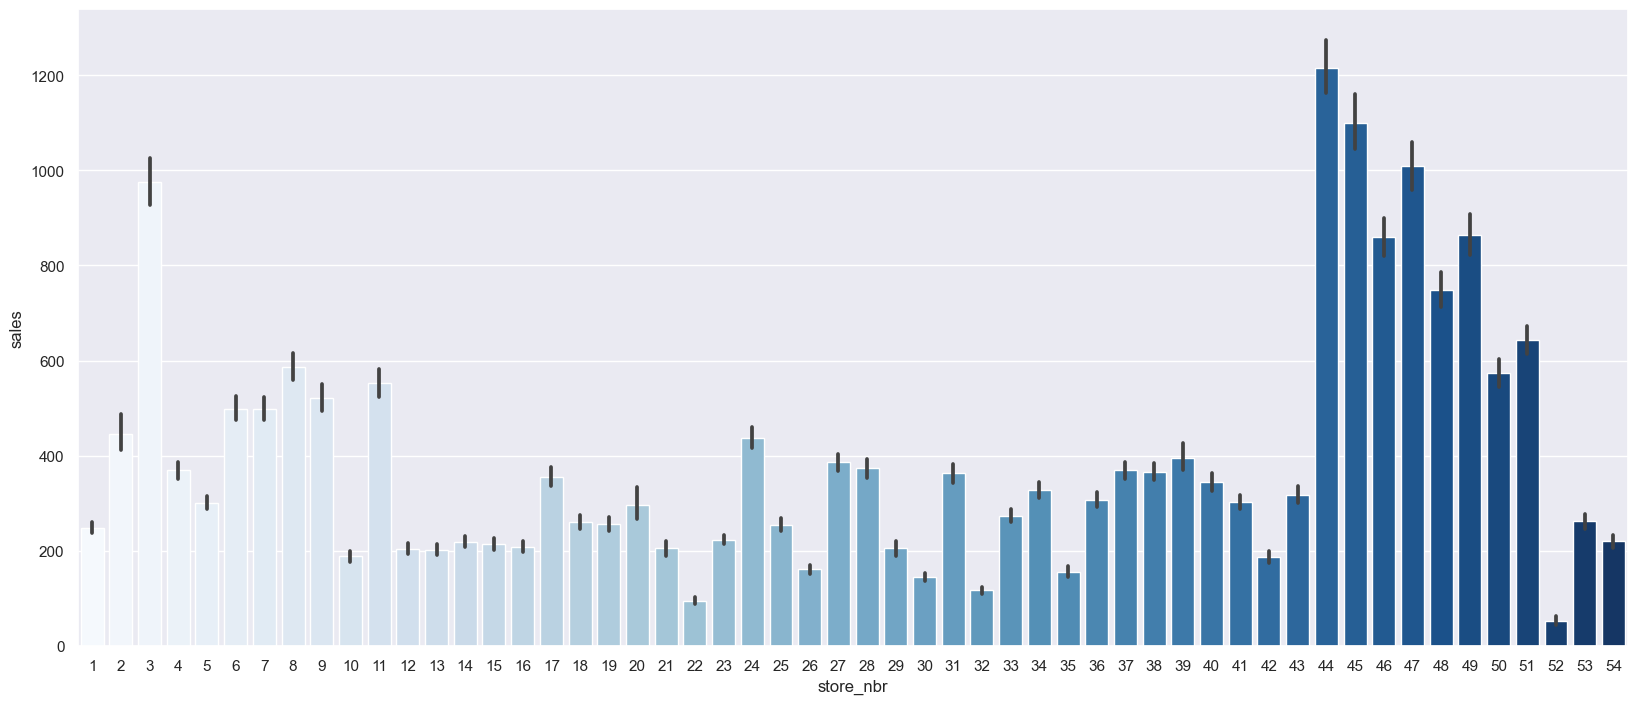

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'store_nbr',y = 'sales',data = Df,palette = "Blues")

In [ ]:
# sns.set(rc={'figure.figsize':(20,8.27)})
# sns.barplot(x = 'month',y = 'sales',data = Df,palette = "Blues")

In [ ]:
# sns.set(rc={'figure.figsize':(20,8.27)})
# sns.barplot(x = 'dayofyear',y = 'sales',data = train1,palette = "Blues")

In [ ]:
# sns.set(rc={'figure.figsize':(20,8.27)})
# sns.barplot(x = 'dayofmonth',y = 'sales',data = train1,palette = "Blues")

In [ ]:
# sns.set(rc={'figure.figsize':(20,8.27)})
# sns.barplot(x = 'family',y = 'sales',data = train1,palette = "Blues")

In [ ]:
#total sales in a specific year
s_2013 = Df[(Df['year'] >= 2014) & (Df['year'] <= 2014)]
t_2013 = s_2013['sales'].sum()

print(f"Total Sales in 2013: {t_2013}")


Total Sales in 2013: 40123355.465884104


In [ ]:
df3

,id,date,store_nbr,family,sales,onpromotion,dcoilwtico,city,state,type,cluster,year,month,day,holi_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,67.714366,Quito,Pichincha,D,13,2013,1,1,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,67.714366,Quito,Pichincha,D,13,2013,1,1,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,67.714366,Quito,Pichincha,D,13,2013,1,1,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,67.714366,Quito,Pichincha,D,13,2013,1,1,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,67.714366,Quito,Pichincha,D,13,2013,1,1,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502519,3000883,2017-08-15,9,POULTRY,438.133,0,47.570000,Quito,Pichincha,B,6,2017,8,15,Holiday,Local,Riobamba,Fundacion de Riobamba,False
502520,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,47.570000,Quito,Pichincha,B,6,2017,8,15,Holiday,Local,Riobamba,Fundacion de Riobamba,False
502521,3000885,2017-08-15,9,PRODUCE,2419.729,148,47.570000,Quito,Pichincha,B,6,2017,8,15,Holiday,Local,Riobamba,Fundacion de Riobamba,False
502522,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.570000,Quito,Pichincha,B,6,2017,8,15,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [ ]:
#check type of national holiday sales in a specific year,month,day
nat_2013 = df3[(df3['locale'] == 'Local') & (df3['date'].dt.year == 2015)]
total_nat = nat_2013['sales'].sum()

print(f"Total sales in the 'National' locale in 2013: {total_nat}")


Total sales in the 'National' locale in 2013: 17203286.4352182


In [ ]:
# Calculate the total sales in the city of Quito for the specified year
year_c = 2013
spe_city = "Quito"
sales_y = df3[(df3['date'].dt.year == year_c) & (df3['city'] == spe_city)]
total_y = sales_y['sales'].sum()

print(f"Total sales in Quito in {year_c}: {total_y}")



Total sales in Quito in 2013: 11245936.847722901


/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='year', ylabel='sales'>

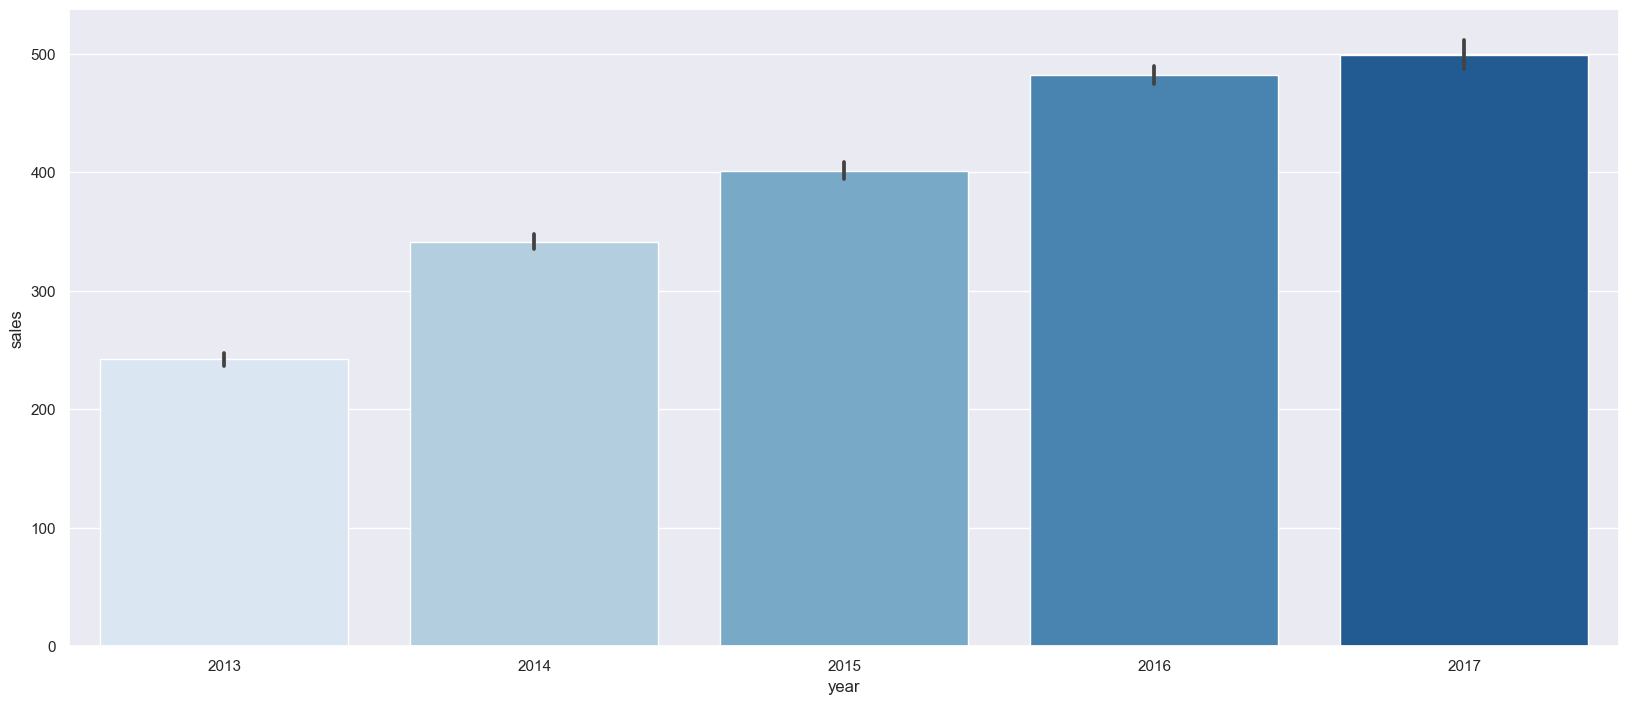

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'year',y = 'sales',data = df3,palette = "Blues")

In [ ]:
#check specific product sales in city in specific year
desired_year = 2013
desired_city = "Quito"
desired_product = "BEAUTY"

sales_in_specific_year_city_product = df3[(df3['date'].dt.year == desired_year) & (df3['city'] == desired_city) & (df3['family'] == desired_product)]


In [ ]:
total_sales_in_specific_year_city_product = sales_in_specific_year_city_product['sales'].sum()
print(f"Total sales of {desired_product} in {desired_city} in {desired_year}: {total_sales_in_specific_year_city_product}")


Total sales of BEAUTY in Quito in 2013: 4329.0


In [ ]:
# sns.set(rc={'figure.figsize':(20,8.27)})
# sns.lineplot(x = "transactions",y = 'sales',data = train1,palette = "Blues")

In [ ]:
# sns.set(rc={'figure.figsize':(20,8.27)})
# sns.lineplot(x = "onpromotion",y = 'sales',data = train1,palette = "Blues")

/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='cluster', ylabel='sales'>

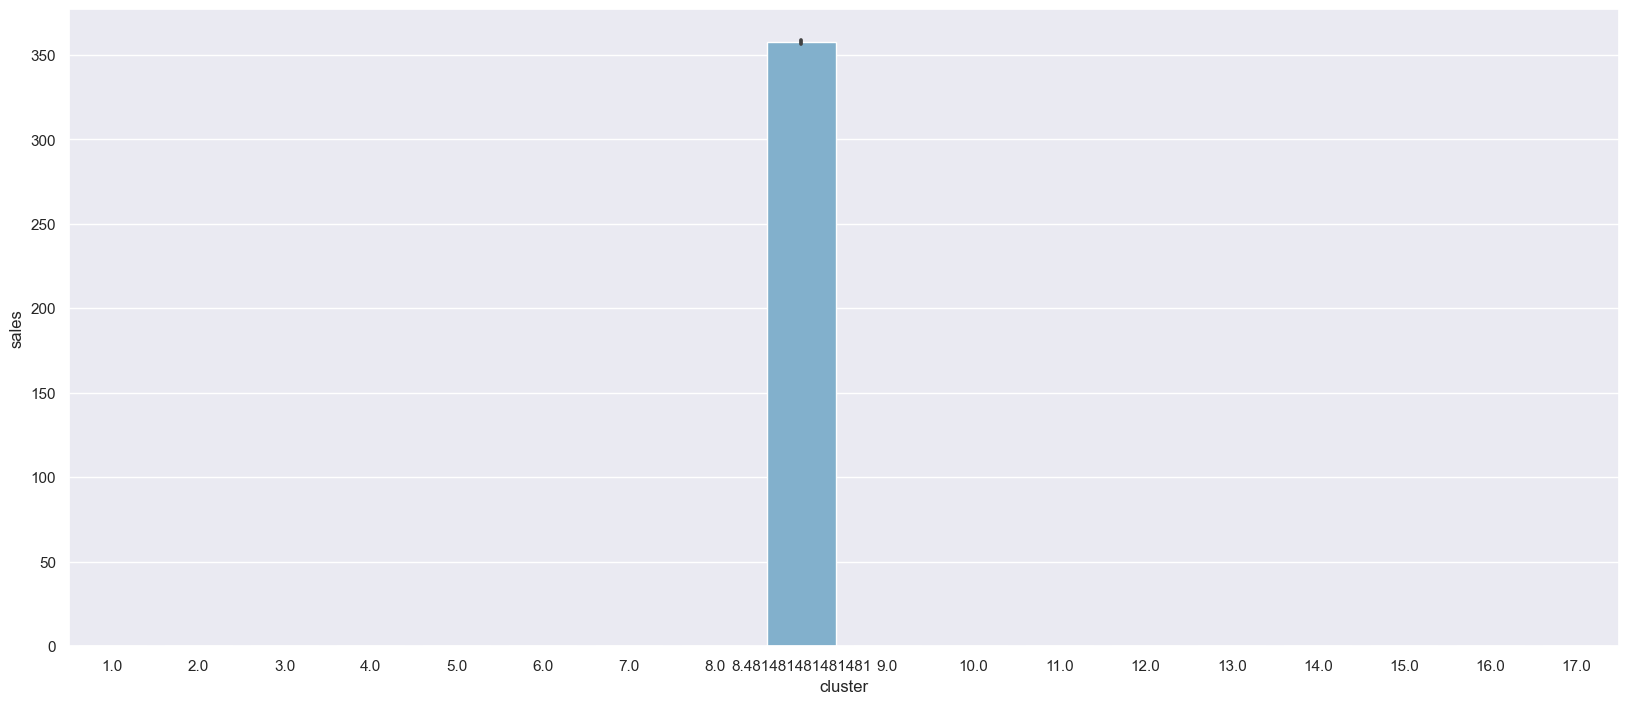

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'cluster',y = 'sales',data = df,palette = "Blues")

/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='city', ylabel='sales'>

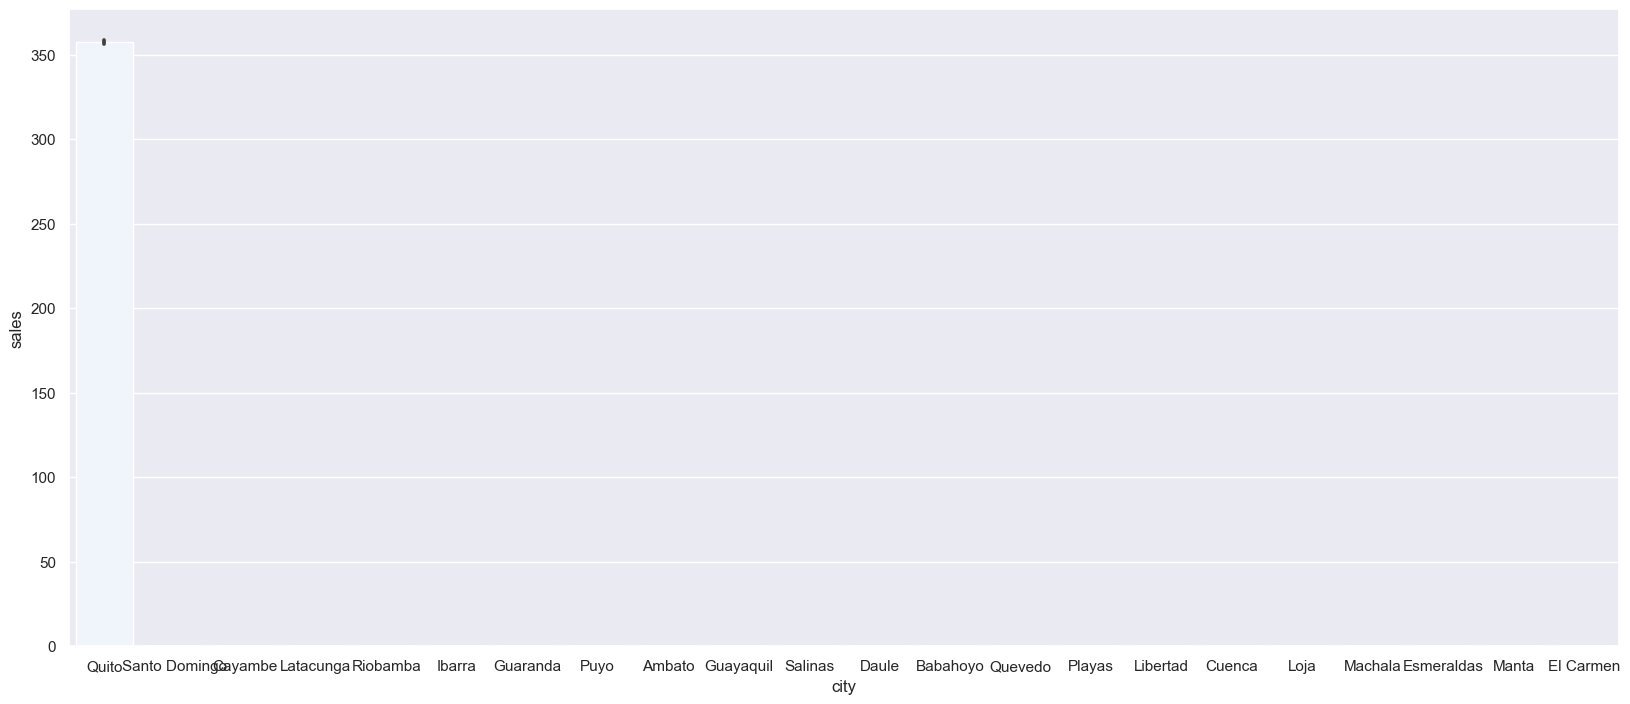

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'city',y = 'sales',data = train1,palette = "Blues")

/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='locale', ylabel='sales'>

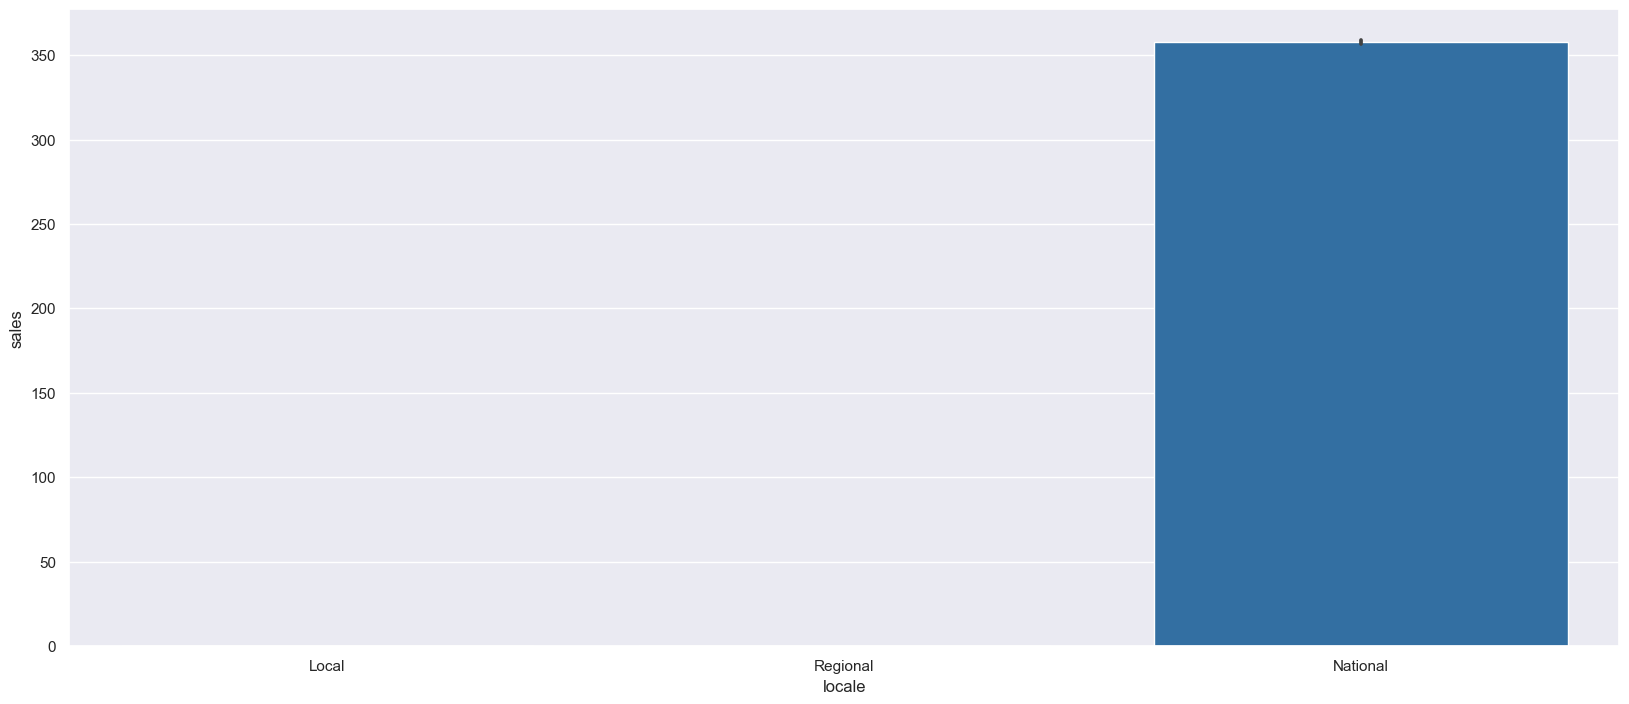

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'locale',y = 'sales',data = train1,palette = "Blues")

/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='locale_name', ylabel='sales'>

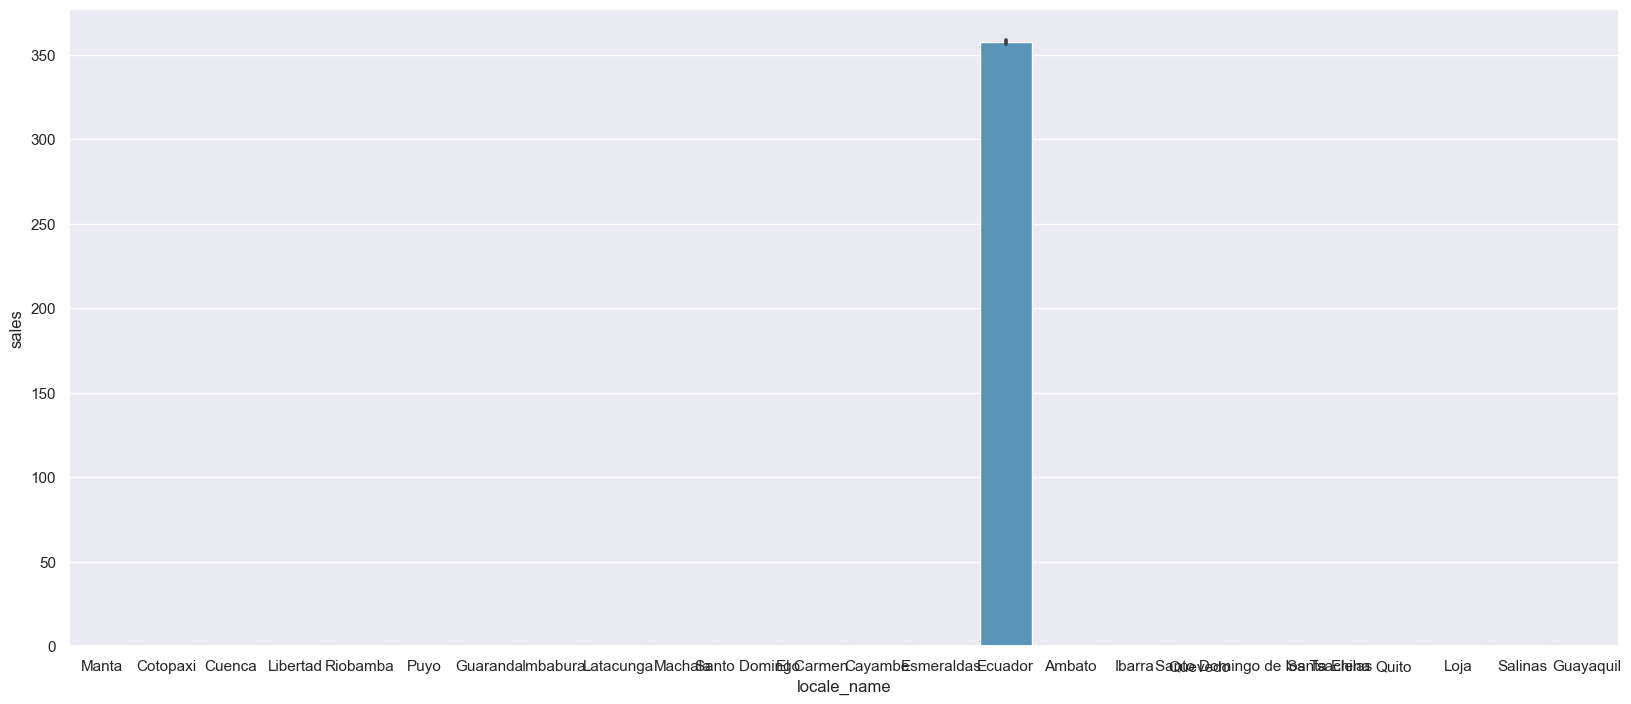

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'locale_name',y = 'sales',data = train1,palette = "Blues")

/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='dayofweek', ylabel='sales'>

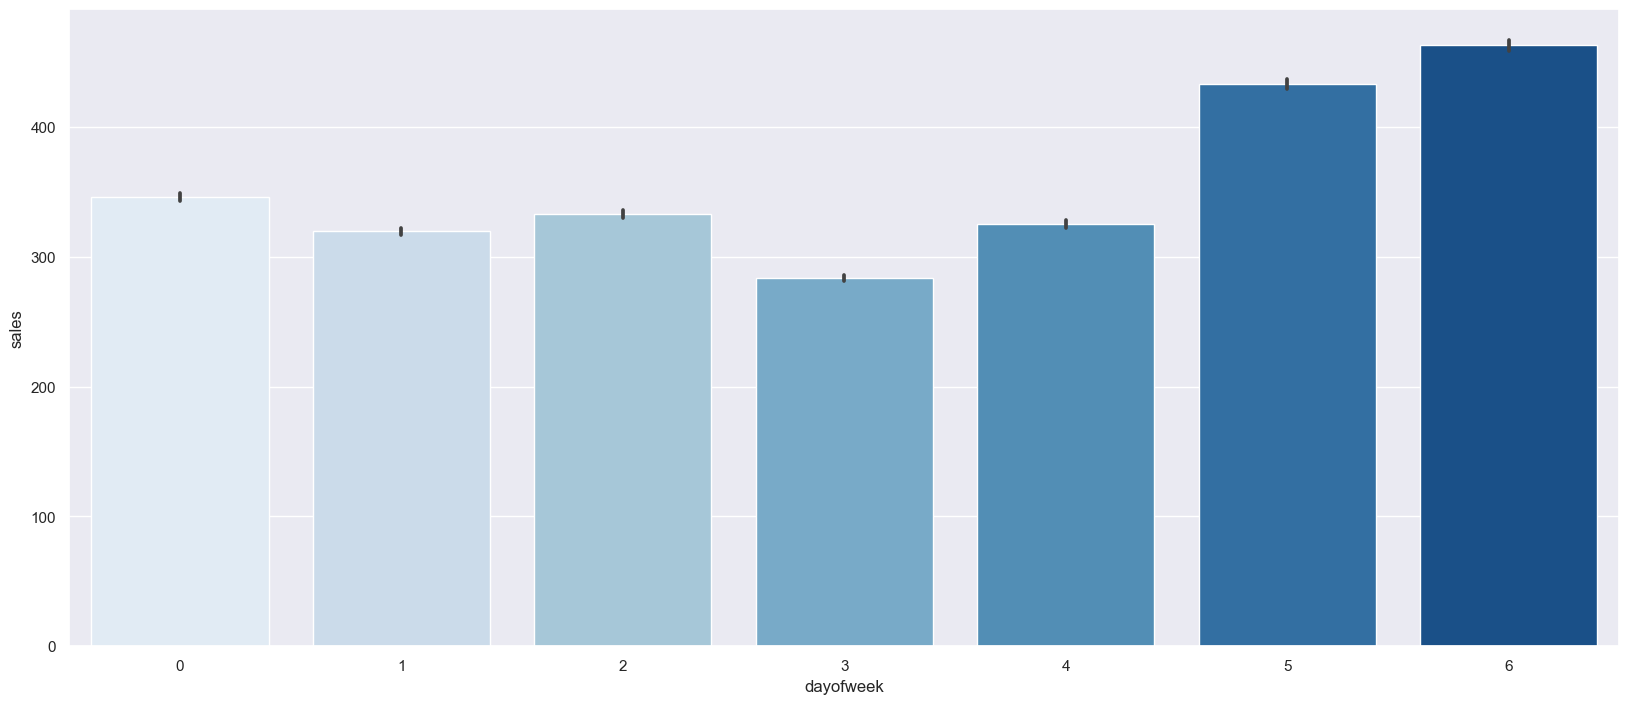

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'dayofweek',y = 'sales',data = train1,palette = "Blues")

/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='year', ylabel='sales'>

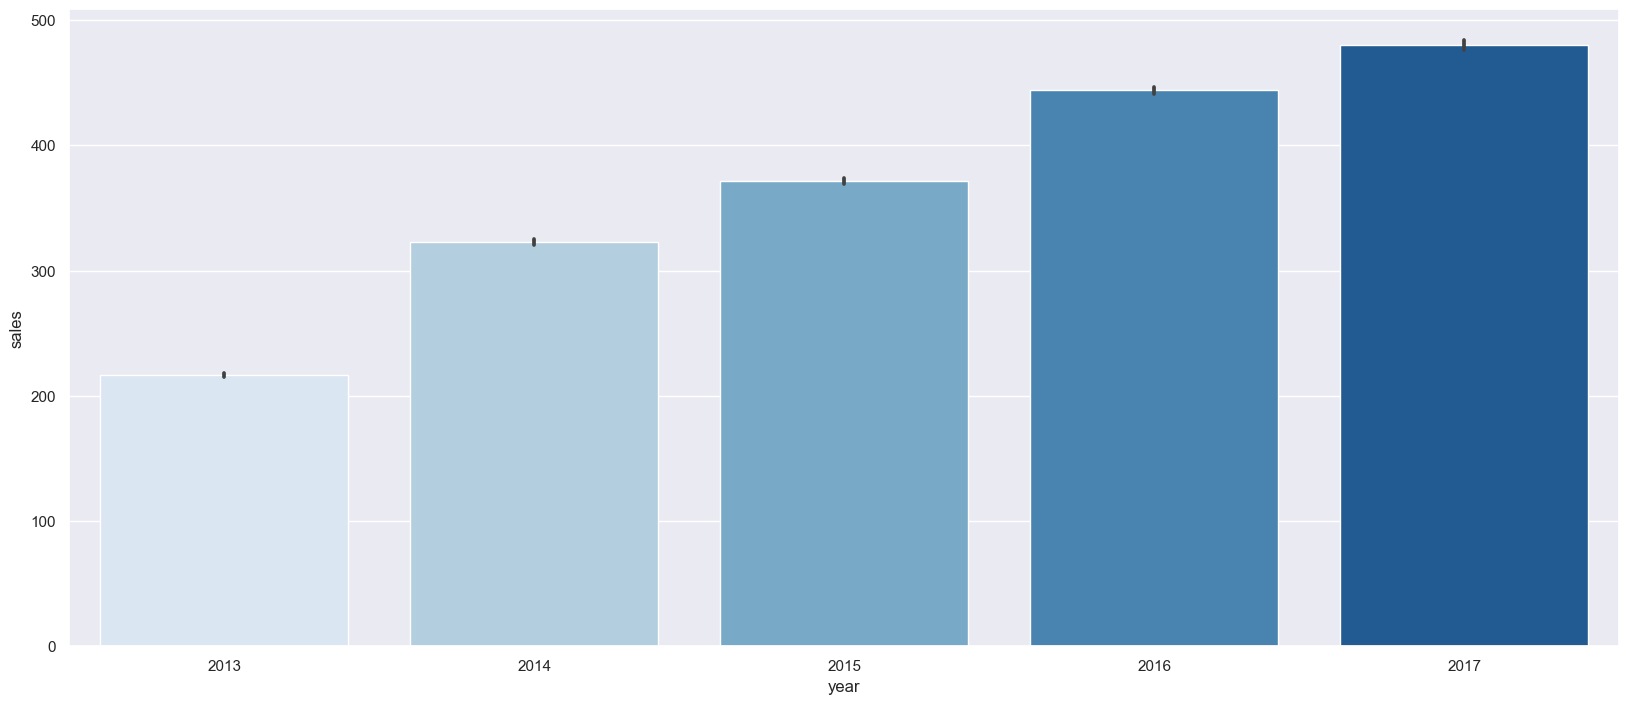

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'year',y = 'sales',data = train1,palette = "Blues")

/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='dayofmonth', ylabel='sales'>

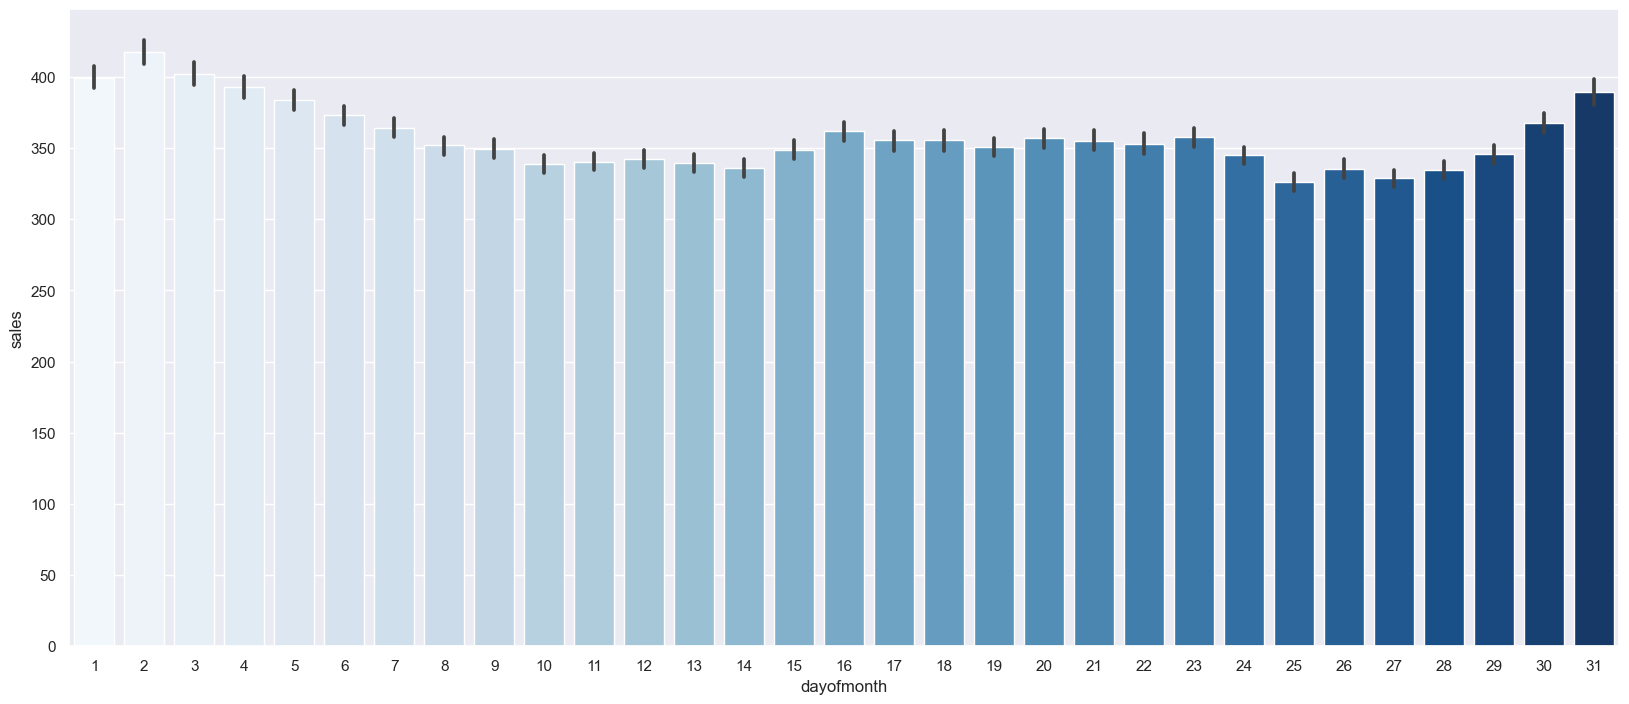

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'dayofmonth',y = 'sales',data = train1,palette = "Blues")

/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='store_type', ylabel='sales'>

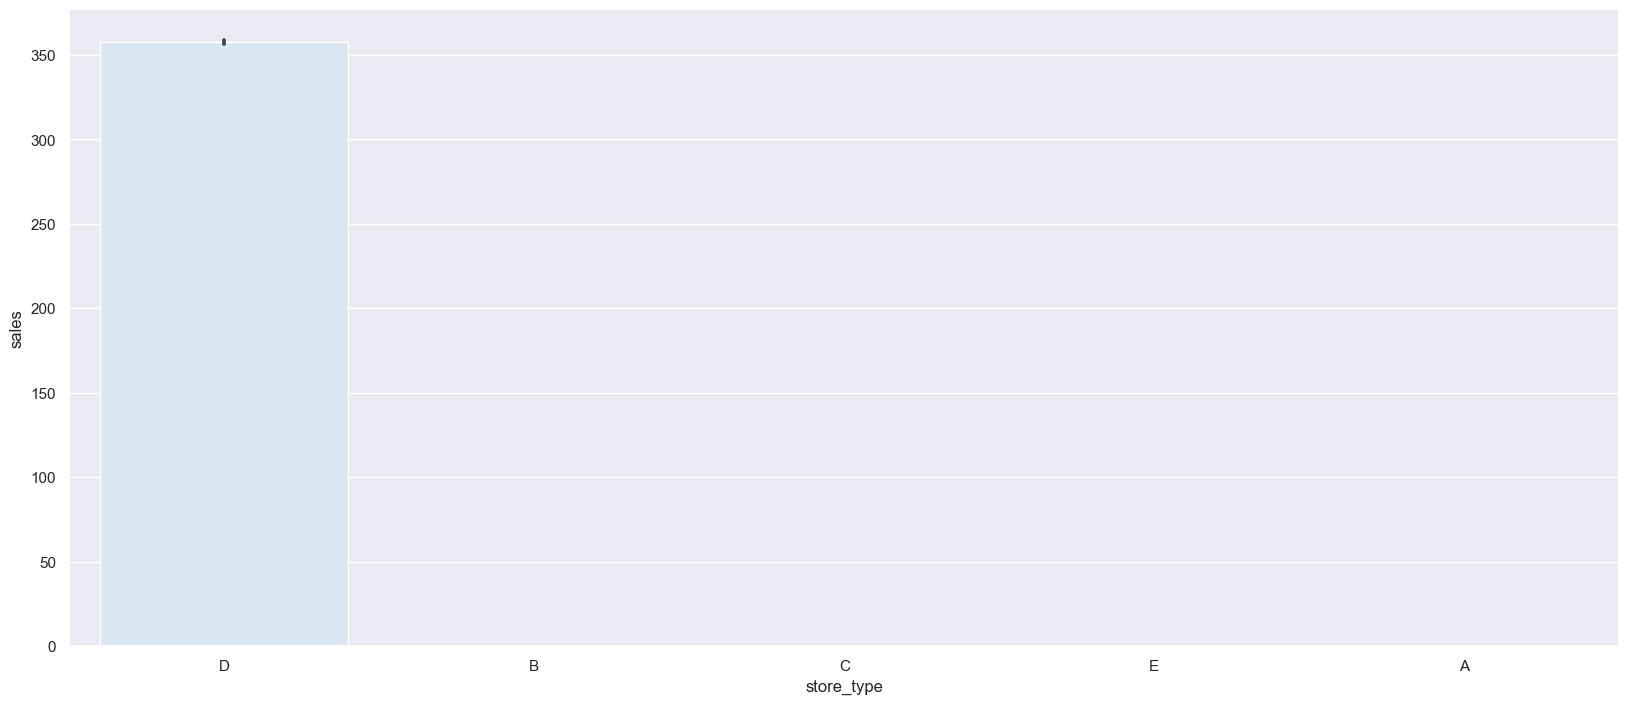

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'store_type',y = 'sales',data = train1,palette = "Blues")

/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/hi/anaconda3/envs/test/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='store_nbr', ylabel='sales'>

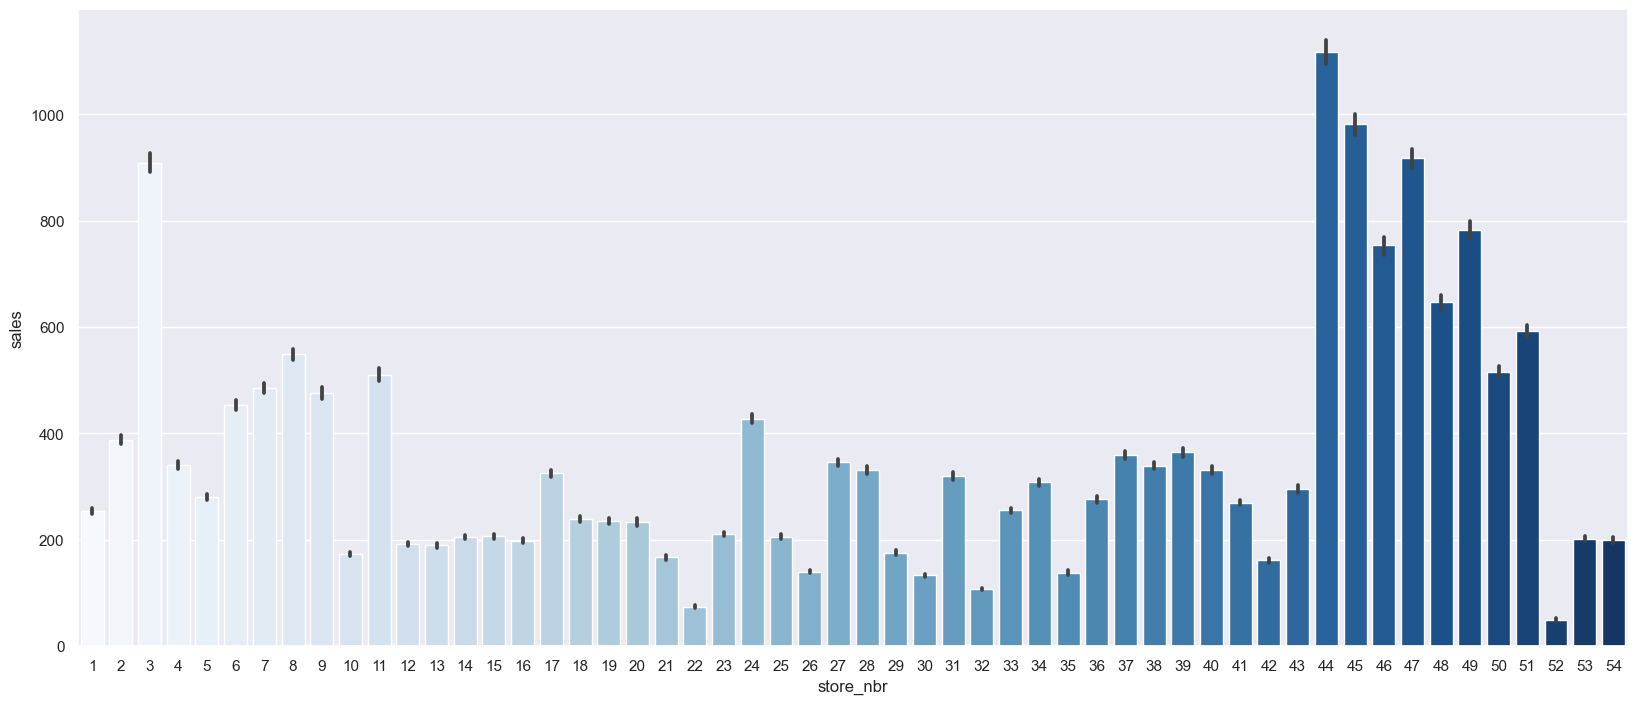

In [ ]:
sns.set(rc={'figure.figsize':(20,8.27)})
sns.barplot(x = 'store_nbr',y = 'sales',data = train1,palette = "Blues")